### Some more IPython widgets

### IPYNb and OpenStreetMapp/Google Maps

In [1]:
http://www.machinalis.com/blog/embedding-interactive-maps-into-an-ipython-nb/

https://github.com/pfctdayelise/dapbook

SyntaxError: invalid syntax (<ipython-input-1-a51e60be3a02>, line 1)

# Using IPython widgets

In [2]:
%matplotlib inline

import pylab as plt
import numpy as np

from IPython.html import widgets
[widget for widget in dir(widgets) if widget.endswith('Widget')]

:0: FutureWarning: IPython widgets are experimental and may change in the future.


['AccordionWidget',
 'BoundedFloatTextWidget',
 'BoundedIntTextWidget',
 'ButtonWidget',
 'CheckboxWidget',
 'ContainerWidget',
 'DOMWidget',
 'DropdownWidget',
 'FloatProgressWidget',
 'FloatSliderWidget',
 'FloatTextWidget',
 'HTMLWidget',
 'ImageWidget',
 'IntProgressWidget',
 'IntSliderWidget',
 'IntTextWidget',
 'LatexWidget',
 'RadioButtonsWidget',
 'SelectWidget',
 'TabWidget',
 'TextWidget',
 'TextareaWidget',
 'ToggleButtonWidget',
 'ToggleButtonsWidget',
 'Widget']

In [3]:
hh = np.random.normal(1., 0.1, (256,256))
hh.shape
vv = hh**2

In [4]:
data={'hh':hh, 'vv':vv}

In [5]:
def ntrctv_imshow(key = 'hh', FixedColor=True, vmi=-1., vma=1.):
    if FixedColor==False:
        plt.imshow(data[key])
        plt.colorbar()
    else:
        plt.imshow(data[key], vmin=vmi, vmax=vma)
        plt.colorbar()

In [6]:
[(data.keys()[i]) for i in np.arange(len(data.keys()))]

['hh', 'vv']

In [7]:
key=[widgets.Button(description=data.keys()[i], options=data.keys()[i]) for i in np.arange(len(data.keys()))]

In [8]:
from IPython.display import display
display(*key)

In [9]:
widgets.HBox(key)

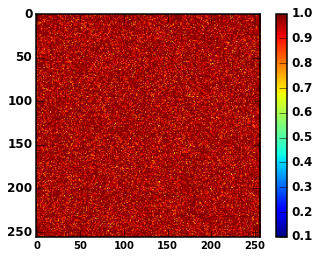

In [10]:
ntrctv = widgets.interact(ntrctv_imshow, key=widgets.RadioButtons(description='polarization', options=data.keys()), \
                 vmi=widgets.FloatSliderWidget(min=0.0, max=2, value=0.1, step=0.1), \
                 vma=widgets.FloatSliderWidget(min=0.0, max=2, value=1., step=0.1));

In [11]:
ntrctv.widget.children[0]

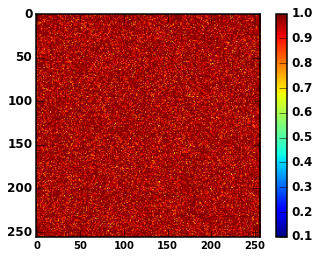

In [12]:
widgets.interact(ntrctv_imshow, key=widgets.RadioButtons(description='polarization', options=data.keys()), \
                 vmi=widgets.FloatSliderWidget(min=0.0, max=2, value=0.1, step=0.1), \
                 vma=widgets.FloatSliderWidget(min=0.0, max=2, value=1., step=0.1));

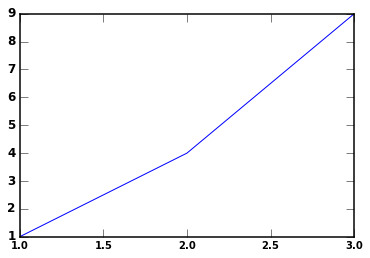

In [13]:
from IPython.html import widgets
from IPython.html.widgets import interact

import matplotlib.pyplot as plt


def f(values):
    data = {
        'foo': ([1, 2, 3], [1, 4, 9]),
        'bar': ([1, 2, 3], [9, 4, 1]),
        'baz': ([1, 2, 3], [2, 2, 2])
    }    

    for item in values:
        plt.plot(*data[item])


__ = interact(f, values=widgets.SelectMultiple(
    height=100,  # it is going to be a long list
    description=' ',
    options=['foo', 'bar', 'baz']))

# MPLD3

<function __main__.on_value_change>

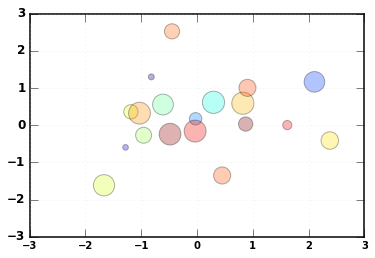

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt, numpy as np
from IPython.html import widgets

import mpld3         # Notice that as you hover over the plot, a toolbar appears in the lower left.
mpld3.enable_notebook()

def on_value_change(value):
    fig, ax = plt.subplots()
    x, y = np.random.normal(size=(2, 100))
    color, size = np.random.random((2, 100))

    ax.scatter(x[:value], y[:value], c=color[:value], s=500 * size,
alpha=0.3)
    ax.axis((-3,3,-3,3))
    ax.grid(color='lightgray', alpha=0.7)


widgets.interact(on_value_change, value = widgets.IntSliderWidget(min=1,
value=20))

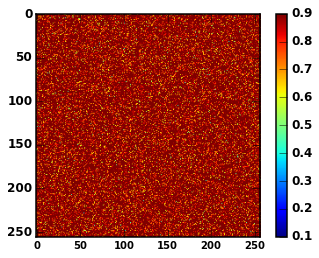

In [19]:
mpld3.enable_notebook()
widgets.interact(ntrctv_imshow, key=widgets.RadioButtons(description='polarization', options=data.keys()), \
                 vmi=widgets.FloatSliderWidget(min=0.0, max=2, value=0.1, step=0.1), \
                 vma=widgets.FloatSliderWidget(min=0.0, max=2, value=1., step=0.1));

# Matplotlib Widgets - don't work in Jupyter

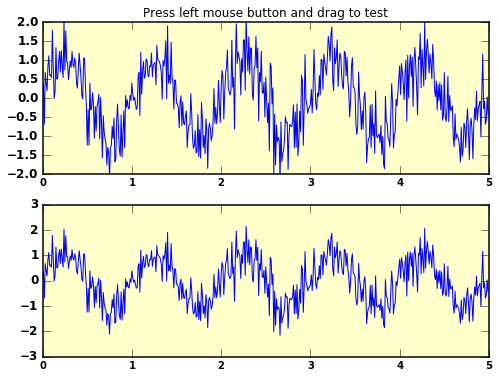

In [2]:
%matplotlib inline

#!/usr/bin/env python
"""
The SpanSelector is a mouse widget to select a xmin/xmax range and plot the
detail view of the selected region in the lower axes
"""
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import SpanSelector

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(211, axisbg='#FFFFCC')

x = np.arange(0.0, 5.0, 0.01)
y = np.sin(2*np.pi*x) + 0.5*np.random.randn(len(x))

ax.plot(x, y, '-')
ax.set_ylim(-2,2)
ax.set_title('Press left mouse button and drag to test')

ax2 = fig.add_subplot(212, axisbg='#FFFFCC')
line2, = ax2.plot(x, y, '-')


def onselect(xmin, xmax):
    indmin, indmax = np.searchsorted(x, (xmin, xmax))
    indmax = min(len(x)-1, indmax)

    thisx = x[indmin:indmax]
    thisy = y[indmin:indmax]
    line2.set_data(thisx, thisy)
    ax2.set_xlim(thisx[0], thisx[-1])
    ax2.set_ylim(thisy.min(), thisy.max())
    fig.canvas.draw()

# set useblit True on gtkagg for enhanced performance
span = SpanSelector(ax, onselect, 'horizontal', useblit=True,
                    rectprops=dict(alpha=0.5, facecolor='red') )


plt.show()